In [97]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# getting the results from other notebooks
df = (pd.DataFrame([
    {'n': 10, 'algorithm': 's-em', 'precision': 0.51040723981900449, 'recall': 0.047259929612870781}, {'n': 20, 'algorithm': 's-em', 'precision': 0.50214932126696832, 'recall': 0.092990615049438563}, {'n': 30, 'algorithm': 's-em', 'precision': 0.49396681749622928, 'recall': 0.13721300486006369}, {'n': 50, 'algorithm': 's-em', 'precision': 0.50144796380090495, 'recall': 0.23215183509301157}, {'n': 100, 'algorithm': 's-em', 'precision': 0.48821266968325788, 'recall': 0.45204876822523876}, {'n': 150, 'algorithm': 's-em', 'precision': 0.44318250377073903, 'recall': 0.6155312552371377}, {'n': 200, 'algorithm': 's-em', 'precision': 0.39433257918552039, 'recall': 0.73024551701022278},
    {'n': 10, 'algorithm': 'bayessets', 'precision': 0.93022222222222228, 'recall': 0.086131687242798335}, {'n': 20, 'algorithm': 'bayessets', 'precision': 0.90722222222222226, 'recall': 0.16800411522633743}, {'n': 30, 'algorithm': 'bayessets', 'precision': 0.87237037037037046, 'recall': 0.24232510288065842}, {'n': 50, 'algorithm': 'bayessets', 'precision': 0.76764444444444435, 'recall': 0.3553909465020576}, {'n': 100, 'algorithm': 'bayessets', 'precision': 0.5391111111111111, 'recall': 0.49917695473251028}, {'n': 150, 'algorithm': 'bayessets', 'precision': 0.39577777777777784, 'recall': 0.54969135802469138}, {'n': 200, 'algorithm': 'bayessets', 'precision': 0.33533333333333337, 'recall': 0.62098765432098768},
    {'n': 10, 'algorithm': 'centroidknn', 'precision': 0.79311111111111121, 'recall': 0.073436213991769528}, {'n': 20, 'algorithm': 'centroidknn', 'precision': 0.72077777777777785, 'recall': 0.13347736625514403}, {'n': 30, 'algorithm': 'centroidknn', 'precision': 0.66859259259259263, 'recall': 0.1857201646090535}, {'n': 50, 'algorithm': 'centroidknn', 'precision': 0.57320000000000004, 'recall': 0.26537037037037037}, {'n': 100, 'algorithm': 'centroidknn', 'precision': 0.39942222222222223, 'recall': 0.36983539094650203}, {'n': 150, 'algorithm': 'centroidknn', 'precision': 0.32354074074074074, 'recall': 0.44936213991769552}, {'n': 200, 'algorithm': 'centroidknn', 'precision': 0.27305555555555555, 'recall': 0.50565843621399176},
    {'n': 10, 'algorithm': 'anyknn', 'precision': 0.69466666666666677, 'recall': 0.064320987654320982}, {'n': 20, 'algorithm': 'anyknn', 'precision': 0.60644444444444434, 'recall': 0.11230452674897119}, {'n': 30, 'algorithm': 'anyknn', 'precision': 0.5523703703703704, 'recall': 0.15343621399176954}, {'n': 50, 'algorithm': 'anyknn', 'precision': 0.47053333333333336, 'recall': 0.21783950617283948}, {'n': 100, 'algorithm': 'anyknn', 'precision': 0.34562222222222222, 'recall': 0.32002057613168727}, {'n': 150, 'algorithm': 'anyknn', 'precision': 0.27976296296296299, 'recall': 0.38855967078189302}, {'n': 200, 'algorithm': 'anyknn', 'precision': 0.23903333333333332, 'recall': 0.44265432098765434}
])
      .rename(index=str, columns={'algorithm': 'Algorithm', 'precision': 'Precision', 'recall': 'Recall'})
      .replace({'Algorithm': {'bayessets': 'Bernoulli Bayesian Sets',
                              's-em': 'Spy-EM',
                              'anyknn': 'Any k-NN',
                              'centroidknn': 'Centroid k-NN'}})
)
df

,Algorithm,n,Precision,Recall
0,Spy-EM,10,0.510407,0.047260
1,Spy-EM,20,0.502149,0.092991
2,Spy-EM,30,0.493967,0.137213
3,Spy-EM,50,0.501448,0.232152
4,Spy-EM,100,0.488213,0.452049
5,Spy-EM,150,0.443183,0.615531
6,Spy-EM,200,0.394333,0.730246
7,Bernoulli Bayesian Sets,10,0.930222,0.086132
8,Bernoulli Bayesian Sets,20,0.907222,0.168004
9,Bernoulli Bayesian Sets,30,0.872370,0.242325


In [3]:
times = {'Any k-NN': 65.0, 'Centroid k-NN': 9.39, 'Bernoulli Bayesian Sets': 2.52, 'Spy-EM': 481.39}

In [9]:
sns.set_style('darkgrid')

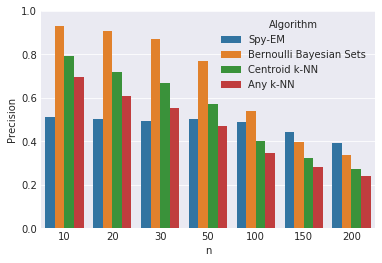

In [10]:
sns.barplot(x='n', y='Precision', hue='Algorithm', data=df)
plt.ylim((0, 1));

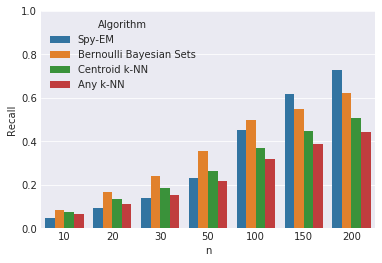

In [11]:
sns.barplot(x='n', y='Recall', hue='Algorithm', data=df)
plt.ylim((0, 1));

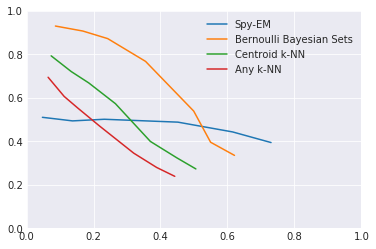

In [107]:
handles = []
colors = []
for i, algo in enumerate(df['Algorithm'].unique()):
    line, = plt.plot(df.loc[df['Algorithm'] == algo, 'Recall'],
             df.loc[df['Algorithm'] == algo, 'Precision'], label=algo)
    colors.append(line.get_color())
    handles.append(line)

plt.legend(handles, list(df['Algorithm'].unique()))
plt.ylim((0, 1))
plt.xlim((0, 1))

colors = [matplotlib.colors.hsv_to_rgb((c[0], c[1] * 0.8, c[2])) for c in [matplotlib.colors.rgb_to_hsv(matplotlib.colors.to_rgb(color)) for color in colors]]

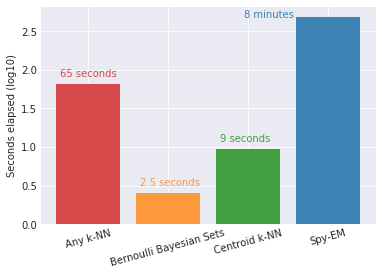

In [108]:
x = ['Spy-EM', 'Bernoulli Bayesian Sets', 'Centroid k-NN', 'Any k-NN']
y = np.array([times[xi] for xi in x])
logy = np.log10(y)

plt.bar(x, logy, color=colors)

plt.text(1.95, logy[0], '8 minutes', color=colors[0])
plt.text(0.65, logy[1] + 0.1, '2.5 seconds', color=colors[1])
plt.text(1.65, logy[2] + 0.1, '9 seconds', color=colors[2])
plt.text(-0.35, logy[3] + 0.1, '65 seconds', color=colors[3])

plt.xticks(rotation=15)
plt.ylabel('Seconds elapsed (log10)');